In [4]:
import os 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import Sequential, layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import load_img, img_to_array

2026-01-30 03:15:24.150076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769742924.339669    2991 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769742924.391887    2991 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769742924.845023    2991 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769742924.845105    2991 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769742924.845108    2991 computation_placer.cc:177] computation placer alr

In [5]:
train_dir = '/kaggle/input/dogs-vs-cats/train/train'
test_dir  = '/kaggle/input/dogs-vs-cats/test/test'

In [6]:
images_file = os.listdir(train_dir)
images_file[:5]

['cat.12461.jpg',
 'dog.3443.jpg',
 'dog.7971.jpg',
 'dog.10728.jpg',
 'dog.1942.jpg']

In [7]:
labels = []
for name in images_file:
    if name.startswith('cat'):
        labels.append(0)
    else :
        labels.append(1)

lables = np.array(labels)
img_paths = [os.path.join(train_dir,name) for name in images_file]

In [7]:
labels[:5]

[0, 1, 1, 1, 1]

In [8]:
img_paths[:5]


['/kaggle/input/dogs-vs-cats/train/train/cat.12461.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.3443.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.7971.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.10728.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.1942.jpg']

In [9]:
def show_img (img_path):
    img = tf.io.read_file(img_path)
    dec_img = tf.image.decode_image(img)
    plt.imshow(dec_img)
    plt.axis('off')
    plt.show()

I0000 00:00:1769740830.614645    2057 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769740830.619980    2057 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


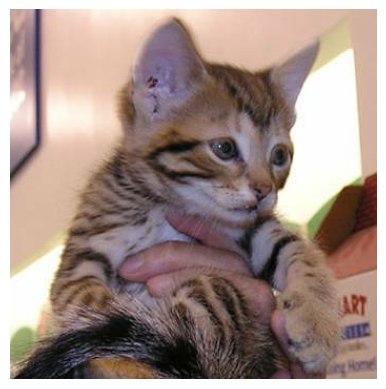

In [10]:
show_img(img_paths[0])

In [11]:
img_paths[:5]

['/kaggle/input/dogs-vs-cats/train/train/cat.12461.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.3443.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.7971.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.10728.jpg',
 '/kaggle/input/dogs-vs-cats/train/train/dog.1942.jpg']

In [12]:
img_size = (128,128)
images_nor = []

for path in img_paths: 
    img = load_img(path, target_size = img_size)
    img_nor = img_to_array(img) / 255.0
    images_nor.append(img_nor)

images_nor = np.array(images_nor).astype('float32')   

In [13]:
test_paths = [os.path.join(test_dir, f) for f in os.listdir(test_dir)]
test_images_nor = []
for path in test_paths:
    img = load_img(path, target_size = img_size)
    img_nor = img_to_array(img) / 255.0
    test_images_nor.append(img_nor)

test_images_nor = np.array(test_images_nor)

In [14]:
images_nor[0].shape

(128, 128, 3)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(images_nor, labels, test_size = 0.2, random_state = 3)

In [16]:
data_augmentation = Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomFlip('horizontal')
])


In [17]:
X_train = np.array(X_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# التأكد من الأشكال
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (20000, 128, 128, 3)
y_train shape: (20000,)
X_val shape: (5000, 128, 128, 3)
y_val shape: (5000,)


In [18]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(64, (3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'nadam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.fit(X_train, y_train, batch_size = 32, validation_data = (X_val, y_val), epochs = 30)

Epoch 1/30


I0000 00:00:1769741062.314365    2096 cuda_dnn.cc:529] Loaded cuDNN version 91002


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.5050 - loss: 0.6961 - val_accuracy: 0.5286 - val_loss: 0.6893
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5496 - loss: 0.6879 - val_accuracy: 0.5654 - val_loss: 0.6828
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5774 - loss: 0.6774 - val_accuracy: 0.6724 - val_loss: 0.6211
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6629 - loss: 0.6304 - val_accuracy: 0.7248 - val_loss: 0.5527
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7134 - loss: 0.5689 - val_accuracy: 0.7516 - val_loss: 0.5171
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7428 - loss: 0.5377 - val_accuracy: 0.7720 - val_loss: 0.4776
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7652 - loss: 0.5079 - val_accuracy: 0.7894 - val_loss: 0.4522
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7809 - loss: 0.4760 - val_accurac

In [21]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, batch_size=32)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8630 - loss: 0.3188
Validation Loss: 0.3157
Validation Accuracy: 0.8604


In [22]:
model.save('Cat_Vs_Dog_CNN.h5')

# **EfficientNetB0**

In [8]:
img_size = (128,128)
images = []

for path in img_paths: 
    img = load_img(path, target_size = img_size)
    images.append(img)

images = np.array(images).astype('float32')   

In [9]:
X_train_eff, X_val_eff, y_train_eff, y_val_eff = train_test_split(images, labels, test_size = 0.2, random_state = 3)

In [12]:
X_train_eff = np.array(X_train_eff, dtype=np.float32)
X_val_eff = np.array(X_val_eff, dtype=np.float32)
y_train_eff = np.array(y_train_eff, dtype=np.float32)
y_val_eff = np.array(y_val_eff, dtype=np.float32)

# التأكد من الأشكال
print("X_train shape:", X_train_eff.shape)
print("y_train shape:", y_train_eff.shape)
print("X_val shape:", X_val_eff.shape)
print("y_val shape:", y_val_eff.shape)

X_train shape: (20000, 128, 128, 3)
y_train shape: (20000,)
X_val shape: (5000, 128, 128, 3)
y_val shape: (5000,)


In [13]:
X_train_eff = preprocess_input(X_train_eff)
X_val_eff = preprocess_input(X_val_eff)

In [14]:
eff_model = tf.keras.applications.EfficientNetB0(
    weights = 'imagenet',
    include_top = False,
    input_shape = (128,128,3)
)

eff_model.trainable = False

I0000 00:00:1769743098.347927    2991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769743098.353855    2991 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [15]:
base = Sequential([
    eff_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation= 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

base.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [16]:
base.fit(X_train_eff, y_train_eff, batch_size = 32, validation_data = (X_val_eff, y_val_eff), epochs = 5)

Epoch 1/5


I0000 00:00:1769743120.206131    3073 service.cc:152] XLA service 0x79ce6c055e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769743120.206166    3073 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769743120.206171    3073 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769743122.335450    3073 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-30 03:18:48.555393: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:18:48.688444: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:18:49.018061: E external/local_xl

623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9453 - loss: 0.1315

2026-01-30 03:19:21.173860: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:19:21.307332: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:19:21.616971: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:19:21.758435: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-30 03:19:22.470730: E external/local_xla/xla/stream_

625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 47ms/step - accuracy: 0.9454 - loss: 0.1314 - val_accuracy: 0.9794 - val_loss: 0.0572
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9765 - loss: 0.0618 - val_accuracy: 0.9776 - val_loss: 0.0589
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9806 - loss: 0.0547 - val_accuracy: 0.9776 - val_loss: 0.0668
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9823 - loss: 0.0448 - val_accuracy: 0.9764 - val_loss: 0.0643
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9840 - loss: 0.0409 - val_accuracy: 0.9782 - val_loss: 0.0677


In [17]:
base.save('Cat_vs_dog_Pretrained.h5')